Step 1: Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

KeyboardInterrupt: 

In [3]:
(x_train, y_train) , (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

NameError: name 'tf' is not defined

In [77]:
type(x_train)
type(y_test)

numpy.ndarray

In [78]:
print(len(x_train))

60000


In [79]:
print(len(y_train))

60000


In [80]:
print(x_train[0].shape)

(28, 28)


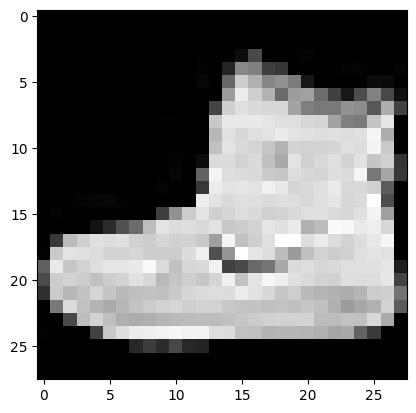

In [81]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [82]:
print(y_train[0])

9


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [85]:
x_train , x_test  = x_train/255.0 , x_test/255.0

In [84]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [86]:
#reshape the images
x_train = x_train.reshape([x_train.shape[0],28,28,1])
x_test = x_test.reshape([x_test.shape[0],28,28,1])

In [87]:
x_train.shape

(60000, 28, 28, 1)

step 4 : Train /validation/Testsplit

In [90]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Train:", x_train.shape, y_train.shape)
print("Validation:", x_val.shape, y_val.shape)
print("Test:", x_test.shape, y_test.shape)


Train: (30720, 28, 28, 1) (30720,)
Validation: (7680, 28, 28, 1) (7680,)
Test: (10000, 28, 28, 1) (10000,)


Building CNN Models

In [110]:
from tensorflow.keras import models, layers

def build_model():
  model = models.Sequential([

      layers.Conv2D(32,(3,3),activation='relu',input_shape =[28,28,1]),
      layers.MaxPooling2D(2,2),

      layers.Conv2D(64,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),

      layers.Flatten(),
      layers.Dense(128,activation='relu'),

      layers.Dense(10)
  ])
  return model

model = build_model()
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),metrics=['accuracy'])
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,354 (255.29 KB)

 Trainable params: 65,354 (255.29 KB)

 Non-trainable params: 0 (0.00 B)

Model Traning

In [116]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
)

Epoch 1/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8391 - loss: 0.4262 - val_accuracy: 0.8191 - val_loss: 0.5025
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8353 - loss: 0.4334 - val_accuracy: 0.8251 - val_loss: 0.4826
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8439 - loss: 0.4153 - val_accuracy: 0.8270 - val_loss: 0.4734
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8438 - loss: 0.4140 - val_accuracy: 0.8248 - val_loss: 0.4852
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8451 - loss: 0.4146 - val_accuracy: 0.8292 - val_loss: 0.4721
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8463 - loss: 0.4057 - val_accuracy: 0.8258 - val_loss: 0.4814
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8489 - loss: 0.4080 - val_accuracy: 0.8302 - val_loss: 0.4658
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8479 - loss: 0.4053 - val_accuracy: 0.

Model Evaluation

In [117]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8384 - loss: 0.4646
0.458755761384964
0.8335999846458435


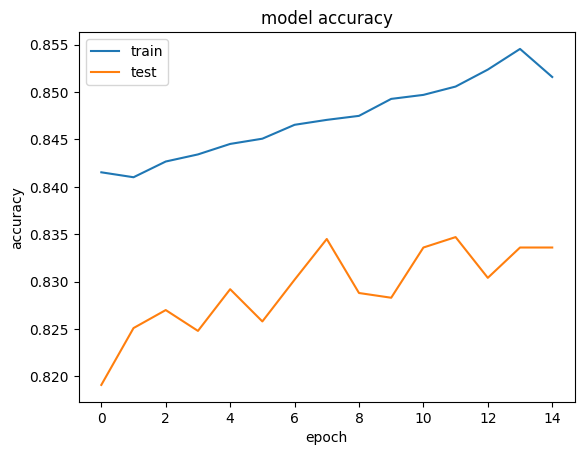

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

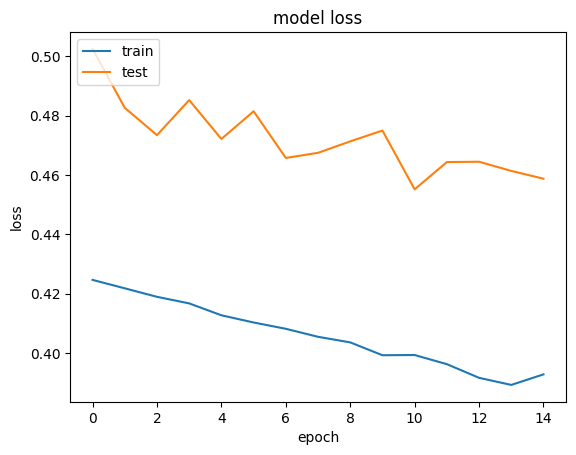

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
model.save('fashion_mnist.keras')